# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
#sat_2017 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/sat_2017.csv')
act_2017 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/act_2017.csv')

In [3]:
sat_2017 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/sat_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
sat_2017[:10]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017[:10]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

The SAT or ACT data shows the average scores and partipication of students in their state as well as a national average

#### 4a. Does the data look complete? 

In [6]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [7]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [8]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

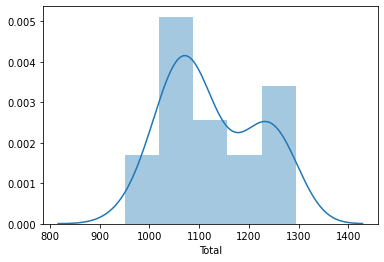

In [9]:
sns.distplot(sat_2017['Total'])

In [10]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

ValueError: could not convert string to float: '20.2x'

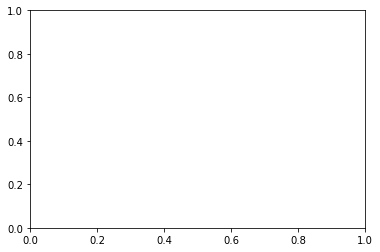

In [11]:
sns.distplot(act_2017['Composite']) # Interesting, the composite value for 2017 is an object

In [13]:
act_2017['Composite'][51] # interesting, position 51 is a string

'20.2x'

Answer: The data mostly looks complete, the datatypes look right, and there are no unfilled entries

However, an error was found in act 2017 when trying to run a simple data visualization

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [14]:
# sat: each section is graded between 200 and 800 points. In the case where we ignore the essay, we have a score range between 400 - 1200
# act: composite is from 1 to 36

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [15]:
#code
act_2017.iloc[51]

State            Wyoming
Participation       100%
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite          20.2x
Name: 51, dtype: object

In [16]:
#act_2017.iloc[51]['Composite'] = 20.2

In [17]:
# So we don't want to do it by chained indexing, let's try to pass a tuple

# because we only have one entry to fix in this column, it can be done manually and not need a function

In [18]:
act_2017.loc[(51, 'Composite')] = 20.2

In [19]:
# We fixed the offending cell

In [20]:
act_2017['Composite']

0     21.0
1     19.2
2     19.8
3     19.7
4     19.4
5     22.8
6     20.8
7     25.2
8     24.1
9     24.2
10    19.8
11    21.4
12    19.0
13    22.3
14    21.4
15    22.6
16    21.9
17    21.7
18    20.0
19    19.5
20    24.3
21    23.6
22    25.4
23    24.1
24    21.5
25    18.6
26    20.4
27    20.3
28    21.4
29    17.8
30    25.5
31    23.9
32    19.7
33    24.2
34    19.1
35    20.3
36    22.0
37    19.4
38    21.8
39    23.7
40    24.0
41    18.7
42    21.8
43    19.8
44    20.7
45    20.3
46    23.6
47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: object

In [21]:
# Checking the data again, the dtype is still an object. We want float64, so let's change the entire dataframe

In [22]:
pd.to_numeric(act_2017['Composite']) # This works, let's save it 

0     21.0
1     19.2
2     19.8
3     19.7
4     19.4
5     22.8
6     20.8
7     25.2
8     24.1
9     24.2
10    19.8
11    21.4
12    19.0
13    22.3
14    21.4
15    22.6
16    21.9
17    21.7
18    20.0
19    19.5
20    24.3
21    23.6
22    25.4
23    24.1
24    21.5
25    18.6
26    20.4
27    20.3
28    21.4
29    17.8
30    25.5
31    23.9
32    19.7
33    24.2
34    19.1
35    20.3
36    22.0
37    19.4
38    21.8
39    23.7
40    24.0
41    18.7
42    21.8
43    19.8
44    20.7
45    20.3
46    23.6
47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: float64

In [23]:
act_2017['Composite'] = pd.to_numeric(act_2017['Composite'])

In [24]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [25]:
# All fixed

#### 5. What are your data types? 
Display the data types of each feature. 

In [26]:
#code

sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [27]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [28]:
# notice at this point, sat values are in int64, and act values are in float64
# because we are dealing with precise values and decimal places matter - we care less for integer math and more for accurate math

In [29]:
# Wait, why

len(sat_2017), len(act_2017)

(51, 52)

In [30]:
# Maybe we are dealing with a duplicate row

In [259]:
act_2017

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2
10,Florida,0.73,19.0,19.4,21.0,19.4,19.8


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: ACT 2017 was fixed, but partipication should also be a number, so why is it an object in both SAT and ACT?

In [32]:
act_2017['Participation']

0      60%
1     100%
2      65%
3      62%
4     100%
5      31%
6     100%
7      31%
8      18%
9      32%
10     73%
11     55%
12     90%
13     38%
14     93%
15     35%
16     67%
17     73%
18    100%
19    100%
20      8%
21     28%
22     29%
23     29%
24    100%
25    100%
26    100%
27    100%
28     84%
29    100%
30     18%
31     34%
32     66%
33     31%
34    100%
35     98%
36     75%
37    100%
38     40%
39     23%
40     21%
41    100%
42     80%
43    100%
44     45%
45    100%
46     29%
47     29%
48     29%
49     69%
50    100%
51    100%
Name: Participation, dtype: object

In [33]:
sat_2017['Participation']

0       5%
1      38%
2      30%
3       3%
4      53%
5      11%
6     100%
7     100%
8     100%
9      83%
10     61%
11     55%
12     93%
13      9%
14     63%
15      2%
16      4%
17      4%
18      4%
19     95%
20     69%
21     76%
22    100%
23      3%
24      2%
25      3%
26     10%
27      3%
28     26%
29     96%
30     70%
31     11%
32     67%
33     49%
34      2%
35     12%
36      7%
37     43%
38     65%
39     71%
40     50%
41      3%
42      5%
43     62%
44      3%
45     60%
46     65%
47     64%
48     14%
49      3%
50      3%
Name: Participation, dtype: object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [34]:
#code
# This import line is written for sat_2017 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/sat_2017.csv')
#sat_2017 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/sat_2017.csv')

def data_fixer(df, column):
    '''
    This is a small fixer function designed to clean up the Dataframe['Partipication'] series
    from a string percentage to a decimal out of 1
    
    Ex:
    62% -> 0.62
    '''
    for i in range(len(df)):
        if df.loc[i, column] == type(1.01):
            i += 1
        else:
            a = int(df.loc[i, column][:-1]) # take off percent sign at the end
            df.loc[i, column] = a / 100 # Convert to percentage
    df[column] = pd.to_numeric(df[column]) # Convert entire series to number type
        
        

In [35]:
data_fixer(sat_2017, 'Participation')

In [36]:
sat_2017['Participation']

0     0.05
1     0.38
2     0.30
3     0.03
4     0.53
5     0.11
6     1.00
7     1.00
8     1.00
9     0.83
10    0.61
11    0.55
12    0.93
13    0.09
14    0.63
15    0.02
16    0.04
17    0.04
18    0.04
19    0.95
20    0.69
21    0.76
22    1.00
23    0.03
24    0.02
25    0.03
26    0.10
27    0.03
28    0.26
29    0.96
30    0.70
31    0.11
32    0.67
33    0.49
34    0.02
35    0.12
36    0.07
37    0.43
38    0.65
39    0.71
40    0.50
41    0.03
42    0.05
43    0.62
44    0.03
45    0.60
46    0.65
47    0.64
48    0.14
49    0.03
50    0.03
Name: Participation, dtype: float64

In [37]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [38]:
# sat_2017 looks good

In [39]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [40]:
# Doing same thing to act_2017 datatype

data_fixer(act_2017, 'Participation')

In [41]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [42]:
#code

- Finish your data modifications by making sure the columns are now typed appropriately.

In [43]:
#code

- Display the data types again to confirm they are correct.

In [44]:
#Code:

sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [45]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [46]:
fixed_sat_2017 = sat_2017

In [47]:
fixed_act_2017 = act_2017

In [48]:
# All the fields for sat and act 2017 look good at this time 
# setting a new object so any future imports will not affect the modified DataFrames

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [49]:
throwaway = fixed_act_2017

In [50]:
#code

act_columns = [i.lower() for i in list(fixed_act_2017.columns)]
act_columns

['state',
 'participation',
 'english',
 'math',
 'reading',
 'science',
 'composite']

In [51]:
#throwaway.columns = lowercase_columns

In [52]:
#throwaway.columns

In [53]:
# Okay, the above works so now we are going to do it to the fixed data

In [54]:
# changing this entry to specify for act
act_columns = ['act-17-'+i for i in act_columns]

In [55]:
act_columns

['act-17-state',
 'act-17-participation',
 'act-17-english',
 'act-17-math',
 'act-17-reading',
 'act-17-science',
 'act-17-composite']

In [56]:
# fixing state because we are going to use it as an index

In [57]:
act_columns[0] = 'state'

In [58]:
act_columns

['state',
 'act-17-participation',
 'act-17-english',
 'act-17-math',
 'act-17-reading',
 'act-17-science',
 'act-17-composite']

In [59]:
fixed_act_2017.columns = act_columns

In [60]:
fixed_act_2017.head()

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [61]:
sat_lowercase = ['-'.join(i.split()).lower() for i in list(fixed_sat_2017.columns)]
sat_lowercase

['state',
 'participation',
 'evidence-based-reading-and-writing',
 'math',
 'total']

In [62]:
sat_lowercase = ['sat-17-'+i for i in sat_lowercase]

In [63]:
sat_lowercase

['sat-17-state',
 'sat-17-participation',
 'sat-17-evidence-based-reading-and-writing',
 'sat-17-math',
 'sat-17-total']

In [64]:
sat_lowercase[0] = 'state'

In [65]:
# one time fix
#sat_lowercase[1] = 'sat-participation'

In [66]:
sat_lowercase

['state',
 'sat-17-participation',
 'sat-17-evidence-based-reading-and-writing',
 'sat-17-math',
 'sat-17-total']

In [67]:
fixed_sat_2017.columns = sat_lowercase

In [68]:
fixed_sat_2017.head()

,state,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,sat-17-total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [69]:
# Column names have been renamed, we have edited the state to be the same so we can join the dataframes later

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


In [70]:
# See project-readme.md

# Callnames are f strings
# add specific stings
# string manipulation
#

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [71]:
len(act_2017), len(sat_2017)

(52, 51)

In [72]:
# ACT contains an extra row, i think it is the national average

In [73]:
act_2017

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [74]:
# Let's drop row 0

In [75]:
act_2017.drop(0, inplace=True)

In [76]:
len(act_2017)

51

In [77]:
# Okay, both the dataframes are even now 

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [78]:
fixed_act_2017.head(1)

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


In [79]:
fixed_sat_2017.head(1)

,state,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,sat-17-total
0,Alabama,0.05,593,572,1165


In [80]:
#Code:
fixed_act_2017.merge(fixed_sat_2017)

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,sat-17-total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017


In [81]:
# The combined dataframe looks good, let's save it to an object and a csv file

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [82]:
#code
combined_2017 = fixed_act_2017.merge(fixed_sat_2017)

In [83]:
# Final Check before saving, always double check your data !

In [84]:
combined_2017

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,sat-17-total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017


In [85]:
#combined_2017.to_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/combined_2017.csv')

In [86]:
# Only need to do this once !

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [87]:
sat_2018 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/sat_2018.csv')

In [88]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [89]:
act_2018 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/act_2018.csv')

In [90]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [91]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [92]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [93]:
# Changing Partipication to numerical data again:

In [94]:
data_fixer(sat_2018, 'Participation')

In [95]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [96]:
data_fixer(act_2018, 'Participation')

In [97]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [98]:
# Changing case of columns

In [99]:
# I'm making a function for this so I don't have to do it 4 more times

In [100]:
# Example copied from above
# ['-'.join(i.split()).lower() for i in list(fixed_sat_2017.columns)]

In [101]:
def lowercase_column(df,string):
    '''
    This is a function which takes in the columns of a dataframe
    and outputs a list of the columns all in lowercase, removes all spaces,
    replaces them with '-' and appends a string to the front
    
    
    Example:
    
    df.columns  
    >['a', 'b', 'c']
    
    '''
    return [string+i for i in ['-'.join(i.split()).lower() for i in list(df.columns)]]
        

In [102]:
sat_18_lower = lowercase_column(sat_2018, 'sat-18-')

In [103]:
list(sat_2018.columns)

['State',
 'Participation',
 'Evidence-Based Reading and Writing',
 'Math',
 'Total']

In [104]:
sat_18_lower[0] = 'state'

In [105]:
# This is written to fix mistakes
#sat_18_lower[1] = 'sat-18-participation'
#sat_18_lower[2] = 'sat-18-evidence-based-reading-and-writing'
#sat_18_lower[3] = 'sat-18-math'
#sat_18_lower[4] = 'sat-18-total'

In [106]:
sat_2018.columns = sat_18_lower

In [107]:
list(sat_2018.columns)

['state',
 'sat-18-participation',
 'sat-18-evidence-based-reading-and-writing',
 'sat-18-math',
 'sat-18-total']

In [108]:
list(act_2018.columns)

['State', 'Participation', 'Composite']

In [109]:
act_18_lower = lowercase_column(act_2018, 'act-18-')

In [110]:
act_18_lower[0] = 'state'
# Did one to fix errors
#act_18_lower[1] = 'act-18-participation'
#act_18_lower[2] = 'act-18-composite'

In [111]:
act_18_lower

['state', 'act-18-participation', 'act-18-composite']

In [112]:
act_2018.columns = act_18_lower

In [113]:
list(act_2018)

['state', 'act-18-participation', 'act-18-composite']

In [114]:
sat_2018

,state,sat-18-participation,sat-18-evidence-based-reading-and-writing,sat-18-math,sat-18-total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076
5,Colorado,1.00,519,506,1025
6,Connecticut,1.00,535,519,1053
7,Delaware,1.00,505,492,998
8,District of Columbia,0.92,497,480,977
9,Florida,0.56,550,549,1099


In [115]:
act_2018

,state,act-18-participation,act-18-composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9
6,Connecticut,0.26,25.6
7,Delaware,0.17,23.8
8,District of columbia,0.32,23.6
9,Florida,0.66,19.9


In [116]:
len(sat_2018), len(act_2018)

(51, 52)

In [117]:
# Fixing row issues

In [118]:
act_2018

,state,act-18-participation,act-18-composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9
6,Connecticut,0.26,25.6
7,Delaware,0.17,23.8
8,District of columbia,0.32,23.6
9,Florida,0.66,19.9


In [119]:
# Maine is entered in here twice, we are going to remove it
act_2018.drop(19, inplace=True)

In [120]:
len(act_2018), len(sat_2018)

(51, 51)

In [121]:
sat_2018.merge(act_2018)

,state,sat-18-participation,sat-18-evidence-based-reading-and-writing,sat-18-math,sat-18-total,act-18-participation,act-18-composite
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7
5,Colorado,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,505,492,998,0.17,23.8
8,Florida,0.56,550,549,1099,0.66,19.9
9,Georgia,0.70,542,522,1064,0.53,21.4


In [122]:
combined_2018 = sat_2018.merge(act_2018)

In [123]:
combined_2018

,state,sat-18-participation,sat-18-evidence-based-reading-and-writing,sat-18-math,sat-18-total,act-18-participation,act-18-composite
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7
5,Colorado,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,505,492,998,0.17,23.8
8,Florida,0.56,550,549,1099,0.66,19.9
9,Georgia,0.70,542,522,1064,0.53,21.4


In [124]:
#combined_2018.to_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/combined_2018.csv')

In [125]:
# Only need to do it once!

#### Adding 2019 Data

In [126]:
# for sat_2019:

# I got a UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 0: unexpected end of data
# I fixed this by opening and saving the file again as a linux type.The source file was not edited
# You can see this in the repository

In [127]:
sat_2019 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/sat_2019_copy.csv')

In [128]:
act_2019 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/act_2019.csv')

In [129]:
sat_2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [130]:
act_2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [131]:
data_fixer(sat_2019, 'Participation Rate')

ValueError: invalid literal for int() with base 10: ''

In [132]:
# ooh, we have an error, let's see what is going on

In [133]:
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065
5,Colorado,1,518,506,1024
6,Connecticut,1,529,516,1046
7,Delaware,1,499,486,985
8,District of Columbia,0.94,495,480,975
9,Florida,1,516,483,999


In [134]:
# we have a funky symbol, let's look at it

In [135]:
sat_2019.iloc[39]

State                 Puerto Rico
Participation Rate              Ñ
EBRW                          483
Math                          462
Total                         944
Name: 39, dtype: object

In [136]:
# Let's manually change that symbol to np.nan, because there is only one

In [137]:
sat_2019.replace(to_replace='Ñ', value=np.nan, inplace=True)

In [138]:
sat_2019.iloc[39]

State                 Puerto Rico
Participation Rate            NaN
EBRW                          483
Math                          462
Total                         944
Name: 39, dtype: object

In [139]:
# Okay, we fixed it, let's run the above function again

In [140]:
data_fixer(sat_2019, 'Participation Rate')

TypeError: 'float' object is not subscriptable

In [141]:
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065
5,Colorado,1,518,506,1024
6,Connecticut,1,529,516,1046
7,Delaware,1,499,486,985
8,District of Columbia,0.94,495,480,975
9,Florida,1,516,483,999


In [142]:
# Okay, this is getting out of hand
# Let's drop the dataline

In [143]:
sat_2019.drop(39, inplace=True)

In [144]:
sat_2019.drop(47, inplace=True)

In [145]:
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065
5,Colorado,1,518,506,1024
6,Connecticut,1,529,516,1046
7,Delaware,1,499,486,985
8,District of Columbia,0.94,495,480,975
9,Florida,1,516,483,999


In [146]:
data_fixer(sat_2019, 'Participation Rate')

TypeError: 'float' object is not subscriptable

In [147]:
# okay, so let's reload sat_2019, remove the rows, then run the data cleaner

In [148]:
sat_2019 = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/sat_2019_copy.csv')

In [149]:
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [150]:
sat_2019.drop(39, inplace=True)

In [151]:
sat_2019.drop(47, inplace=True)

In [152]:
# fix the index

In [153]:
sat_2019.reset_index(inplace=True, drop=True)

In [154]:
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [155]:
data_fixer(sat_2019, 'Participation Rate')

In [156]:
data_fixer(act_2019, 'Participation')

In [157]:
sat_2019.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

In [158]:
act_2019.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [159]:
sat_19_lower = lowercase_column(sat_2019, 'sat-19-')
sat_19_lower[0] = 'state'
sat_19_lower

['state',
 'sat-19-participation-rate',
 'sat-19-ebrw',
 'sat-19-math',
 'sat-19-total']

In [160]:
act_19_lower = lowercase_column(act_2019, 'act-19-')
act_19_lower[0] = 'state'
act_19_lower

['state', 'act-19-participation', 'act-19-composite']

In [161]:
sat_2019.columns = sat_19_lower

In [162]:
act_2019.columns = act_19_lower

In [163]:
sat_2019

,state,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065
5,Colorado,1.00,518,506,1024
6,Connecticut,1.00,529,516,1046
7,Delaware,1.00,499,486,985
8,District of Columbia,0.94,495,480,975
9,Florida,1.00,516,483,999


In [164]:
act_2019

,state,act-19-participation,act-19-composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6
5,Colorado,0.27,23.8
6,Connecticut,0.22,25.5
7,Delaware,0.13,24.1
8,District of Columbia,0.32,23.5
9,Florida,0.54,20.1


In [165]:
len(act_2019), len(sat_2019)

(52, 51)

In [166]:
sat_2019.merge(act_2019)

,state,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total,act-19-participation,act-19-composite
0,Alabama,0.07,583,560,1143,1.00,18.9
1,Alaska,0.41,556,541,1097,0.38,20.1
2,Arizona,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.06,582,559,1141,1.00,19.3
4,California,0.63,534,531,1065,0.23,22.6
5,Colorado,1.00,518,506,1024,0.27,23.8
6,Connecticut,1.00,529,516,1046,0.22,25.5
7,Delaware,1.00,499,486,985,0.13,24.1
8,District of Columbia,0.94,495,480,975,0.32,23.5
9,Florida,1.00,516,483,999,0.54,20.1


In [167]:
combined_2019 = sat_2019.merge(act_2019)

In [168]:
#combined_2019.to_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/combined_2019.csv')

In [169]:
# Only run once !

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [170]:
combined_2017.dtypes

state                                         object
act-17-participation                         float64
act-17-english                               float64
act-17-math                                  float64
act-17-reading                               float64
act-17-science                               float64
act-17-composite                             float64
sat-17-participation                         float64
sat-17-evidence-based-reading-and-writing      int64
sat-17-math                                    int64
sat-17-total                                   int64
dtype: object

In [171]:
combined_2018.dtypes

state                                         object
sat-18-participation                         float64
sat-18-evidence-based-reading-and-writing      int64
sat-18-math                                    int64
sat-18-total                                   int64
act-18-participation                         float64
act-18-composite                             float64
dtype: object

In [172]:
# participation will be set as a float64 across all datatypes

In [173]:
len(combined_2017.merge(combined_2018))

50

In [174]:
final = combined_2017.merge(combined_2018)

In [175]:
final

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,sat-17-total,sat-18-participation,sat-18-evidence-based-reading-and-writing,sat-18-math,sat-18-total,act-18-participation,act-18-composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,0.06,595,571,1166,1.00,19.1
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.43,562,544,1106,0.33,20.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.29,577,572,1149,0.66,19.2
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,0.05,592,576,1169,1.00,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.60,540,536,1076,0.27,22.7
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,1.00,519,506,1025,0.30,23.9
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,1.00,535,519,1053,0.26,25.6
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,1.00,505,492,998,0.17,23.8
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.56,550,549,1099,0.66,19.9
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.70,542,522,1064,0.53,21.4


In [176]:
# Add 2019 Data

In [177]:
combined_2019.dtypes

state                         object
sat-19-participation-rate    float64
sat-19-ebrw                    int64
sat-19-math                    int64
sat-19-total                   int64
act-19-participation         float64
act-19-composite             float64
dtype: object

In [178]:
final.merge(combined_2019)

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,...,sat-18-math,sat-18-total,act-18-participation,act-18-composite,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total,act-19-participation,act-19-composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,576,1169,1.00,19.4,0.06,582,559,1141,1.00,19.3
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,536,1076,0.27,22.7,0.63,534,531,1065,0.23,22.6
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,506,1025,0.30,23.9,1.00,518,506,1024,0.27,23.8
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,519,1053,0.26,25.6,1.00,529,516,1046,0.22,25.5
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,492,998,0.17,23.8,1.00,499,486,985,0.13,24.1
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,549,1099,0.66,19.9,1.00,516,483,999,0.54,20.1
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,522,1064,0.53,21.4,0.71,538,519,1058,0.49,21.4


In [179]:
final = final.merge(combined_2019)

In [180]:
#final.to_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-1-master/data/final.csv')

In [181]:
# Only need to do this once !

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [182]:
#Code:

final.describe()

,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,sat-17-total,...,sat-18-math,sat-18-total,act-18-participation,act-18-composite,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total,act-19-participation,act-19-composite
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.659200,20.862000,21.13600,21.956000,20.992000,21.466000,0.386000,570.860000,549.220000,1129.620000,...,557.760000,1122.880000,0.623200,21.454000,0.481600,562.120000,553.640000,1115.840000,0.592000,21.424000
std,0.321107,2.324307,1.97399,2.046317,3.195139,2.004241,0.345602,44.385146,84.998269,89.913085,...,46.987432,92.845634,0.341141,2.111312,0.386002,45.742688,50.753409,96.142403,0.346534,2.197267
min,0.080000,16.300000,18.00000,18.100000,2.300000,17.800000,0.020000,503.000000,52.000000,996.000000,...,486.000000,998.000000,0.070000,17.700000,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.310000,19.000000,19.40000,20.425000,19.900000,19.800000,0.040000,535.250000,523.250000,1057.000000,...,524.250000,1062.250000,0.277500,19.925000,0.052500,529.500000,516.750000,1049.000000,0.242500,19.800000
50%,0.710000,20.550000,20.90000,21.700000,21.100000,21.400000,0.340000,559.500000,549.500000,1107.500000,...,545.500000,1098.500000,0.660000,21.050000,0.525000,552.000000,546.000000,1098.500000,0.585000,20.950000
75%,1.000000,23.100000,23.00000,23.875000,22.275000,23.400000,0.650000,613.500000,601.000000,1214.000000,...,594.250000,1207.000000,1.000000,23.650000,0.817500,613.000000,600.500000,1215.000000,1.000000,23.750000
max,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,...,655.000000,1298.000000,1.000000,25.600000,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [183]:
#code

def my_mean(n_list):
    return sum(n_list)/len(n_list)

def my_sdv(n_list):
    return (1 / len(n_list) * sum([(i-my_mean(n_list)) ** 2 for i in n_list])) ** 0.5

In [184]:
my_sdv([-5, 1, 8, 7, 2]) # should equal 4.673328578

4.673328578219169

In [185]:
# it works !

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [186]:
final['state'].dtypes

dtype('O')

In [187]:
#Code:

sd = {i: my_sdv(final[i]) for i in [i for i in final.columns] if final[i].dtype != final['state'].dtypes}
sd

{'act-17-participation': 0.3178794740149165,
 'act-17-english': 2.3009467616613812,
 'act-17-math': 1.9541504548012678,
 'act-17-reading': 2.025750231395766,
 'act-17-science': 3.1630263988781375,
 'act-17-composite': 1.9840977798485642,
 'sat-17-participation': 0.3421286307808805,
 'sat-17-evidence-based-reading-and-writing': 43.93905324423821,
 'sat-17-math': 84.14399324966696,
 'sat-17-total': 89.00941298536914,
 'sat-18-participation': 0.36724754594142633,
 'sat-18-evidence-based-reading-and-writing': 46.537937212558106,
 'sat-18-math': 46.51518461749884,
 'sat-18-total': 91.91248881408882,
 'act-18-participation': 0.33771254048376703,
 'act-18-composite': 2.090091864009809,
 'sat-19-participation-rate': 0.38212228409240934,
 'sat-19-ebrw': 45.28295043391055,
 'sat-19-math': 50.24331199274188,
 'sat-19-total': 95.17612305615312,
 'act-19-participation': 0.34305101661414733,
 'act-19-composite': 2.175183670405789}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

In [188]:
list(final.describe().loc['std'].values)

[0.3211067595370863,
 2.3243072261714137,
 1.9739900543553606,
 2.0463167508716626,
 3.1951391653125665,
 2.0042414209544193,
 0.3456021069474703,
 44.38514643988229,
 84.99826888993513,
 89.91308501626924,
 0.3709760430132867,
 47.01041569347658,
 46.98743210168231,
 92.84563445167842,
 0.3411411820968688,
 2.1113116147773816,
 0.38600179760605,
 45.74268760564638,
 50.75340945619881,
 96.14240288578739,
 0.3465338573440036,
 2.1972673195288253]

In [189]:
list(enumerate(final.describe().loc['std'].values)) 

[(0, 0.3211067595370863),
 (1, 2.3243072261714137),
 (2, 1.9739900543553606),
 (3, 2.0463167508716626),
 (4, 3.1951391653125665),
 (5, 2.0042414209544193),
 (6, 0.3456021069474703),
 (7, 44.38514643988229),
 (8, 84.99826888993513),
 (9, 89.91308501626924),
 (10, 0.3709760430132867),
 (11, 47.01041569347658),
 (12, 46.98743210168231),
 (13, 92.84563445167842),
 (14, 0.3411411820968688),
 (15, 2.1113116147773816),
 (16, 0.38600179760605),
 (17, 45.74268760564638),
 (18, 50.75340945619881),
 (19, 96.14240288578739),
 (20, 0.3465338573440036),
 (21, 2.1972673195288253)]

In [190]:
list(sd.values())[0]

0.3178794740149165

In [191]:
describe_v_my_sdv = {j: list(sd.values())[i] for i,j in list(enumerate(final.describe().loc['std'].values))}
describe_v_my_sdv

{0.3211067595370863: 0.3178794740149165,
 2.3243072261714137: 2.3009467616613812,
 1.9739900543553606: 1.9541504548012678,
 2.0463167508716626: 2.025750231395766,
 3.1951391653125665: 3.1630263988781375,
 2.0042414209544193: 1.9840977798485642,
 0.3456021069474703: 0.3421286307808805,
 44.38514643988229: 43.93905324423821,
 84.99826888993513: 84.14399324966696,
 89.91308501626924: 89.00941298536914,
 0.3709760430132867: 0.36724754594142633,
 47.01041569347658: 46.537937212558106,
 46.98743210168231: 46.51518461749884,
 92.84563445167842: 91.91248881408882,
 0.3411411820968688: 0.33771254048376703,
 2.1113116147773816: 2.090091864009809,
 0.38600179760605: 0.38212228409240934,
 45.74268760564638: 45.28295043391055,
 50.75340945619881: 50.24331199274188,
 96.14240288578739: 95.17612305615312,
 0.3465338573440036: 0.34305101661414733,
 2.1972673195288253: 2.175183670405789}

In [192]:
# Looking at the two and using a dictionary to easily compare keys and values
# format being
# {pandas Df.describe: my_sdv.describe}

# They are not equivalent, but they are close for comparison, we can calculate the average % error of the calculations

In [193]:
f'{np.mean([(i - j) / i * 100 for i, j in describe_v_my_sdv.items()])} %'

'1.005050633883344 %'

In [194]:
# There is about a 1 % error between my calculated value and the value calculated by pandas Dataframe.describe() method

In [195]:
# {i: my_sdv(final[i]) for i in [i for i in final.columns] if final[i].dtype != final['state'].dtypes}

In [196]:
np_std = {i: np.std(final[i]) for i in [i for i in final.columns] if final[i].dtype != final['state'].dtypes}
np_std

{'act-17-participation': 0.3178794740149165,
 'act-17-english': 2.3009467616613812,
 'act-17-math': 1.9541504548012678,
 'act-17-reading': 2.025750231395766,
 'act-17-science': 3.1630263988781375,
 'act-17-composite': 1.9840977798485642,
 'sat-17-participation': 0.3421286307808805,
 'sat-17-evidence-based-reading-and-writing': 43.9390532442382,
 'sat-17-math': 84.14399324966696,
 'sat-17-total': 89.00941298536914,
 'sat-18-participation': 0.36724754594142633,
 'sat-18-evidence-based-reading-and-writing': 46.537937212558106,
 'sat-18-math': 46.51518461749884,
 'sat-18-total': 91.91248881408882,
 'act-18-participation': 0.33771254048376703,
 'act-18-composite': 2.090091864009809,
 'sat-19-participation-rate': 0.38212228409240934,
 'sat-19-ebrw': 45.28295043391055,
 'sat-19-math': 50.24331199274188,
 'sat-19-total': 95.17612305615312,
 'act-19-participation': 0.3430510166141473,
 'act-19-composite': 2.175183670405789}

In [197]:
np_v_my_sdv = {j: list(sd.values())[i] for i,j in list(enumerate(np_std.values()))}
np_v_my_sdv

{0.3178794740149165: 0.3178794740149165,
 2.3009467616613812: 2.3009467616613812,
 1.9541504548012678: 1.9541504548012678,
 2.025750231395766: 2.025750231395766,
 3.1630263988781375: 3.1630263988781375,
 1.9840977798485642: 1.9840977798485642,
 0.3421286307808805: 0.3421286307808805,
 43.9390532442382: 43.93905324423821,
 84.14399324966696: 84.14399324966696,
 89.00941298536914: 89.00941298536914,
 0.36724754594142633: 0.36724754594142633,
 46.537937212558106: 46.537937212558106,
 46.51518461749884: 46.51518461749884,
 91.91248881408882: 91.91248881408882,
 0.33771254048376703: 0.33771254048376703,
 2.090091864009809: 2.090091864009809,
 0.38212228409240934: 0.38212228409240934,
 45.28295043391055: 45.28295043391055,
 50.24331199274188: 50.24331199274188,
 95.17612305615312: 95.17612305615312,
 0.3430510166141473: 0.34305101661414733,
 2.175183670405789: 2.175183670405789}

In [198]:
# Looking at this arranged data, this is set up as
# np.std : my_sdv
# like before we can calculate the % error

In [199]:
[(i - j) / i * 100 for i, j in np_v_my_sdv.items()]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.6171097993634508e-14,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.6181602310683422e-14,
 0.0]

In [200]:
f'{np.mean([(i - j) / i * 100 for i, j in np_v_my_sdv.items()])} %'

'-1.4705772865599058e-15 %'

In [201]:
# Amazingly, if we use the numpy.std method we get results very close to our function which uses python methods
# This suggests that there may be bigger rounding done for df.describe() to have quick computation time

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [202]:
# For comparison, we will compare the top 5 of each sorting method

In [203]:
final.head(0)

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,...,sat-18-math,sat-18-total,act-18-participation,act-18-composite,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total,act-19-participation,act-19-composite


In [204]:
a = [i[-1] for i in np.ndarray.tolist(final.sort_values(by='sat-17-participation', ascending=False)[['state']].head().values)]

In [205]:
b = [i[-1] for i in np.ndarray.tolist(final.sort_values(by='sat-17-participation', ascending=False)[['sat-17-participation']].head().values)]

In [206]:
pd.DataFrame(a, b)

,0
1.00,Michigan
1.00,Connecticut
1.00,Delaware
0.96,New Hampshire
0.95,Maine


In [207]:
act_17_top5 = [i[-1] for i in np.ndarray.tolist(final.sort_values(by='sat-17-participation', ascending=False)[['state']].head().values)]

In [208]:
# After making the above, i wanted to make a function to figure out as much of this analysis as I could

In [209]:
def top_5(frame, sort_by):
    '''
    This is a function that returns a list of the top 5 states by chosen column
    
    Use it by inputing the chosen DataFrame and the column as a string
    
    eg:
    
    top_5(my_dataframe, 'this column')
    
    '''
    states = [i[-1] for i in np.ndarray.tolist(frame.sort_values(by=sort_by, ascending=False)[['state']].head().values)]
    par_numbers = [i[-1] for i in np.ndarray.tolist(frame.sort_values(by=sort_by, ascending=False)[[sort_by]].head().values)]
    return {states[i]: par_numbers[i] for i in range(len(states))}

In [210]:
# testing the function

top_5(final, 'sat-17-participation')

{'Michigan': 1.0,
 'Connecticut': 1.0,
 'Delaware': 1.0,
 'New Hampshire': 0.96,
 'Maine': 0.95}

In [211]:
# Okay, the function works, let's spit out the rest into another dataframe

In [212]:
five_cols_h = ['sat-17-h', 'sat-18-h', 'sat-19-h', 'act-17-h', 'act-18-h', 'act-19-h']

In [213]:
act_17_top5 = top_5(final, 'sat-17-participation')
act_18_top5 = top_5(final, 'sat-18-participation')
act_19_top5 = top_5(final, 'sat-19-participation-rate')
sat_17_top5 = top_5(final, 'act-17-participation')
sat_18_top5 = top_5(final, 'act-18-participation')
sat_19_top5 = top_5(final, 'act-19-participation')
top_5_combined = [act_17_top5, act_18_top5, act_19_top5, sat_17_top5, sat_18_top5, sat_19_top5]

In [214]:
len(top_5_combined), len(five_cols_h)

(6, 6)

In [215]:
top_5_combined

[{'Michigan': 1.0,
  'Connecticut': 1.0,
  'Delaware': 1.0,
  'New Hampshire': 0.96,
  'Maine': 0.95},
 {'Colorado': 1.0,
  'Connecticut': 1.0,
  'Delaware': 1.0,
  'Michigan': 1.0,
  'Idaho': 1.0},
 {'Michigan': 1.0,
  'Colorado': 1.0,
  'Connecticut': 1.0,
  'Delaware': 1.0,
  'Florida': 1.0},
 {'Alabama': 1.0,
  'Kentucky': 1.0,
  'Wisconsin': 1.0,
  'Utah': 1.0,
  'Tennessee': 1.0},
 {'Alabama': 1.0,
  'Kentucky': 1.0,
  'Wisconsin': 1.0,
  'Utah': 1.0,
  'Tennessee': 1.0},
 {'Alabama': 1.0,
  'Kentucky': 1.0,
  'Wisconsin': 1.0,
  'Utah': 1.0,
  'Tennessee': 1.0}]

In [216]:
highest_par_by_state = (pd.DataFrame(data=top_5_combined)).T
highest_par_by_state.columns = five_cols_h
highest_par_by_state.fillna('', inplace=True)
highest_par_by_state

,sat-17-h,sat-18-h,sat-19-h,act-17-h,act-18-h,act-19-h
Michigan,1,1,1,,,
Connecticut,1,1,1,,,
Delaware,1,1,1,,,
New Hampshire,0.96,,,,,
Maine,0.95,,,,,
Colorado,,1,1,,,
Idaho,,1,,,,
Florida,,,1,,,
Alabama,,,,1,1,1
Kentucky,,,,1,1,1


In [217]:
def bot_5(frame, sort_by):
    '''
    This is a function that returns a list of the top 5 states by chosen column
    
    Use it by inputing the chosen DataFrame and the column as a string
    
    eg:
    
    top_5(my_dataframe, 'this column')
    
    '''
    states = [i[-1] for i in np.ndarray.tolist(frame.sort_values(by=sort_by, ascending=True)[['state']].head().values)]
    par_numbers = [i[-1] for i in np.ndarray.tolist(frame.sort_values(by=sort_by, ascending=True)[[sort_by]].head().values)]
    return {states[i]: par_numbers[i] for i in range(len(states))}

In [218]:
act_17_bot5 = bot_5(final, 'sat-17-participation')
act_18_bot5 = bot_5(final, 'sat-18-participation')
act_19_bot5 = bot_5(final, 'sat-19-participation-rate')
sat_17_bot5 = bot_5(final, 'act-17-participation')
sat_18_bot5 = bot_5(final, 'act-18-participation')
sat_19_bot5 = bot_5(final, 'act-19-participation')
bot_5_combined = [act_17_bot5, act_18_bot5, act_19_bot5, sat_17_bot5, sat_18_bot5, sat_19_bot5]

In [219]:
final.sort_values(by='sat-19-participation-rate', ascending=False).head()

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,...,sat-18-math,sat-18-total,act-18-participation,act-18-composite,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total,act-19-participation,act-19-composite
21,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,499,1011,0.22,24.2,1.0,507,496,1003,0.19,24.4
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,506,1025,0.30,23.9,1.0,518,506,1024,0.27,23.8
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,519,1053,0.26,25.6,1.0,529,516,1046,0.22,25.5
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,492,998,0.17,23.8,1.0,499,486,985,0.13,24.1
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,549,1099,0.66,19.9,1.0,516,483,999,0.54,20.1


In [220]:
act_19_bot5

{'North Dakota': 0.02,
 'Wyoming': 0.03,
 'South Dakota': 0.03,
 'Nebraska': 0.03,
 'Wisconsin': 0.03}

In [221]:
five_cols_b = ['sat-17-b', 'sat-18-b', 'sat-19-b', 'act-17-b', 'act-18-b', 'act-19-b']

In [222]:
lowest_par_by_state = (pd.DataFrame(data=bot_5_combined).T)
lowest_par_by_state.columns = five_cols_b
lowest_par_by_state.fillna('', inplace=True)
lowest_par_by_state

,sat-17-b,sat-18-b,sat-19-b,act-17-b,act-18-b,act-19-b
North Dakota,0.02,0.02,0.02,,,
Mississippi,0.02,,,,,
Iowa,0.02,,,,,
Missouri,0.03,,,,,
Utah,0.03,,,,,
Wyoming,,0.03,0.03,,,
South Dakota,,0.03,0.03,,,
Nebraska,,0.03,0.03,,,
Wisconsin,,0.03,0.03,,,
Maine,,,,0.08,0.07,0.06


In [223]:
high_low_par = highest_par_by_state.join(lowest_par_by_state, how='outer')
high_low_par.fillna('', inplace=True)
high_low_par
#high_low_par[['sat-17-h', 'sat-17-b', 'act-17-h', 'act-17-b', 'sat-18-h', 'sat-18-b', 'act-18-h', 'act-18-b', 'sat-19-h', 'sat-19-b']]

,sat-17-h,sat-18-h,sat-19-h,act-17-h,act-18-h,act-19-h,sat-17-b,sat-18-b,sat-19-b,act-17-b,act-18-b,act-19-b
Alabama,,,,1,1,1,,,,,,
Colorado,,1,1,,,,,,,,,
Connecticut,1,1,1,,,,,,,,,
Delaware,1,1,1,,,,,,,0.18,0.17,0.13
Florida,,,1,,,,,,,,,
Idaho,,1,,,,,,,,,,
Iowa,,,,,,,0.02,,,,,
Kentucky,,,,1,1,1,,,,,,
Maine,0.95,,,,,,,,,0.08,0.07,0.06
Michigan,1,1,1,,,,,,,,,


In [224]:
# The created DataFrame above just tells me I should focus on those states, so I am going to pull the missing data from the orignal set

In [225]:
list(high_low_par.index)

['Alabama',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Idaho',
 'Iowa',
 'Kentucky',
 'Maine',
 'Michigan',
 'Mississippi',
 'Missouri',
 'Nebraska',
 'New Hampshire',
 'North Dakota',
 'Pennsylvania',
 'Rhode Island',
 'South Dakota',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming']

In [226]:
final_state_index = final.set_index('state')

In [227]:
state_mapping = pd.Series(high_low_par.index)

In [228]:
pd.Index(state_mapping).get_loc('Alabama')

0

In [263]:
[final_state_index.loc[i] for i in pd.Series(high_low_par.index)]

[act-17-participation                            1.00
 act-17-english                                 18.90
 act-17-math                                    18.40
 act-17-reading                                 19.70
 act-17-science                                 19.40
 act-17-composite                               19.20
 sat-17-participation                            0.05
 sat-17-evidence-based-reading-and-writing     593.00
 sat-17-math                                   572.00
 sat-17-total                                 1165.00
 sat-18-participation                            0.06
 sat-18-evidence-based-reading-and-writing     595.00
 sat-18-math                                   571.00
 sat-18-total                                 1166.00
 act-18-participation                            1.00
 act-18-composite                               19.10
 sat-19-participation-rate                       0.07
 sat-19-ebrw                                   583.00
 sat-19-math                

   
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
    

In [230]:
final.sort_values(by='sat-19-participation-rate', ascending=False).head(0)

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,...,sat-18-math,sat-18-total,act-18-participation,act-18-composite,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total,act-19-participation,act-19-composite


In [231]:
# Highest ACT 2017
final.sort_values(by='act-17-composite', ascending=False)[['state', 'act-17-composite']].head()

,state,act-17-composite
28,New Hampshire,25.5
20,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
31,New York,24.2


In [232]:
# Lowest ACT 2017
final.sort_values(by='act-17-composite', ascending=True)[['state', 'act-17-composite']].head()

,state,act-17-composite
27,Nevada,17.8
23,Mississippi,18.6
39,South Carolina,18.7
10,Hawaii,19.0
32,North Carolina,19.1


In [233]:
# Highest ACT 2018
final.sort_values(by='act-18-composite', ascending=False)[['state', 'act-18-composite']].head()

,state,act-18-composite
6,Connecticut,25.6
20,Massachusetts,25.5
28,New Hampshire,25.1
31,New York,24.5
21,Michigan,24.2


In [234]:
# Lowest ACT 2018
final.sort_values(by='act-18-composite', ascending=True)[['state', 'act-18-composite']].head()

,state,act-18-composite
27,Nevada,17.7
39,South Carolina,18.3
23,Mississippi,18.6
10,Hawaii,18.9
0,Alabama,19.1


In [235]:
# Highest ACT 2019
final.sort_values(by='act-19-composite', ascending=False)[['state', 'act-19-composite']].head()

,state,act-19-composite
6,Connecticut,25.5
20,Massachusetts,25.5
28,New Hampshire,25.0
38,Rhode Island,24.7
31,New York,24.5


In [236]:
#Lowest ACT 2019
final.sort_values(by='act-19-composite', ascending=True)[['state', 'act-19-composite']].head()

,state,act-19-composite
27,Nevada,17.9
23,Mississippi,18.4
39,South Carolina,18.8
17,Louisiana,18.8
0,Alabama,18.9


In [237]:
# Highest SAT 2017
final.sort_values(by='sat-17-total', ascending=False)[['state', 'sat-17-total']].head()

,state,sat-17-total
22,Minnesota,1295
48,Wisconsin,1291
14,Iowa,1275
24,Missouri,1271
15,Kansas,1260


In [238]:
# Lowest SAT 2017
final.sort_values(by='sat-17-total', ascending=True)[['state', 'sat-17-total']].head()

,state,sat-17-total
7,Delaware,996
11,Idaho,1005
21,Michigan,1005
18,Maine,1012
8,Florida,1017


In [239]:
# Highest SAT 2018
final.sort_values(by='sat-18-total', ascending=False)[['state', 'sat-18-total']].head()

,state,sat-18-total
22,Minnesota,1298
48,Wisconsin,1294
33,North Dakota,1283
14,Iowa,1265
15,Kansas,1265


In [240]:
# Lowest SAT 2018
final.sort_values(by='sat-18-total', ascending=True)[['state', 'sat-18-total']].head()

,state,sat-18-total
7,Delaware,998
47,West Virginia,999
11,Idaho,1001
43,Utah,1010
10,Hawaii,1010


In [241]:
# Highest SAT 2019
final.sort_values(by='sat-19-total', ascending=False)[['state', 'sat-19-total']].head()

,state,sat-19-total
22,Minnesota,1284
48,Wisconsin,1283
40,South Dakota,1268
33,North Dakota,1263
26,Nebraska,1260


In [242]:
# Highest SAT 2019
final.sort_values(by='sat-19-total', ascending=True)[['state', 'sat-19-total']].head()

,state,sat-19-total
47,West Virginia,943
35,Oklahoma,963
7,Delaware,985
11,Idaho,993
38,Rhode Island,995


- Do any states with 100% participation on a given test have a rate change year-to-year?

In [377]:
final.sort_values(by='act-17-participation', ascending=False)[['state','act-17-participation', 'act-18-participation', 'act-19-participation']].head(10)

,state,act-17-participation,act-18-participation,act-19-participation
0,Alabama,1.0,1.0,1.00
16,Kentucky,1.0,1.0,1.00
48,Wisconsin,1.0,1.0,1.00
43,Utah,1.0,1.0,1.00
41,Tennessee,1.0,1.0,1.00
39,South Carolina,1.0,1.0,0.78
35,Oklahoma,1.0,1.0,1.00
32,North Carolina,1.0,1.0,1.00
27,Nevada,1.0,1.0,1.00
24,Missouri,1.0,1.0,0.82


In [378]:
final.sort_values(by='sat-17-participation', ascending=False)[['state','sat-17-participation', 'sat-18-participation', 'sat-19-participation-rate']].head(10)

,state,sat-17-participation,sat-18-participation,sat-19-participation-rate
21,Michigan,1.00,1.00,1.00
6,Connecticut,1.00,1.00,1.00
7,Delaware,1.00,1.00,1.00
28,New Hampshire,0.96,0.96,0.95
18,Maine,0.95,0.99,0.99
11,Idaho,0.93,1.00,1.00
8,Florida,0.83,0.56,1.00
20,Massachusetts,0.76,0.80,0.81
38,Rhode Island,0.71,0.97,1.00
29,New Jersey,0.70,0.82,0.82


In [385]:
final[(final.sort_values(by='act-17-participation', ascending=False)[['state','act-17-participation', 'act-18-participation', 'act-19-participation']]['act-17-participation'] < 0.5 )].sort_values(by='act-17-participation').head(20)[['state','act-17-participation', 'act-18-participation', 'act-19-participation']]

<ipython-input-385-9c809c72a4f6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final[(final.sort_values(by='act-17-participation', ascending=False)[['state','act-17-participation', 'act-18-participation', 'act-19-participation']]['act-17-participation'] < 0.5 )].sort_values(by='act-17-participation').head(20)[['state','act-17-participation', 'act-18-participation', 'act-19-participation']]


,state,act-17-participation,act-18-participation,act-19-participation
18,Maine,0.08,0.07,0.06
28,New Hampshire,0.18,0.16,0.14
7,Delaware,0.18,0.17,0.13
38,Rhode Island,0.21,0.15,0.12
37,Pennsylvania,0.23,0.20,0.17
19,Maryland,0.28,0.31,0.28
44,Vermont,0.29,0.24,0.20
45,Virginia,0.29,0.24,0.21
46,Washington,0.29,0.24,0.24
20,Massachusetts,0.29,0.25,0.21


In [394]:
# This monstrosity sorts initially by partipication 2017, but then includes information from 2017, 2018, 2019, and uses a boolean mask for filtering values above or below a threshold

In [384]:
final[(final.sort_values(by='sat-17-participation', ascending=False)[['state','sat-17-participation', 'sat-18-participation', 'sat-19-participation-rate']]['sat-17-participation'] < 0.5 )].sort_values(by='sat-17-participation').head(30)[['state','sat-17-participation', 'sat-18-participation', 'sat-19-participation-rate']]

<ipython-input-384-82815fcee52b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final[(final.sort_values(by='sat-17-participation', ascending=False)[['state','sat-17-participation', 'sat-18-participation', 'sat-19-participation-rate']]['sat-17-participation'] < 0.5 )].sort_values(by='sat-17-participation').head(30)[['state','sat-17-participation', 'sat-18-participation', 'sat-19-participation-rate']]


,state,sat-17-participation,sat-18-participation,sat-19-participation-rate
33,North Dakota,0.02,0.02,0.02
14,Iowa,0.02,0.03,0.03
23,Mississippi,0.02,0.03,0.03
49,Wyoming,0.03,0.03,0.03
43,Utah,0.03,0.04,0.04
3,Arkansas,0.03,0.05,0.06
40,South Dakota,0.03,0.03,0.03
22,Minnesota,0.03,0.04,0.04
24,Missouri,0.03,0.04,0.04
48,Wisconsin,0.03,0.03,0.03


- Do any states show have >50% participation on *both* tests either year?

In [ ]:
# We have a contending list: Texas, Georgia

# Note: Alaska dropped from 65% to 38 %, maybe because of SAT contract

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [389]:
#code
'''
I have found Alaska, Florida, Illinois, Interesting

Alaska: ACT 2017 -> 2019, dropped by 50%

Florida: SAT 2017 -> 2019, dropped 32 % then returned back to 100%

Illinois, SAT 2017 - > 2019, increased by 90%

Colorado, SAT 2017 - > 2019, increased by 89%

West Virginia, SAT 2018 -> 2019, increased by 77%
''' 

'\nI have found Alaska, Florida, Illinois, Interesting\n\nAlaska: ACT 2017 -> 2019, dropped by 50%\n\nFlorida: SAT 2017 -> 2019, dropped 32 % then returned back to 100%\n\nIllinois, SAT 2017 - > 2019, increased by 90%\n\nColorado, SAT 2017 - > 2019, increased by 89%\n\nWest Virginia, SAT 2018 -> 2019, increased by 77%\n'

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [392]:
#sns.heatmap(final.corr())

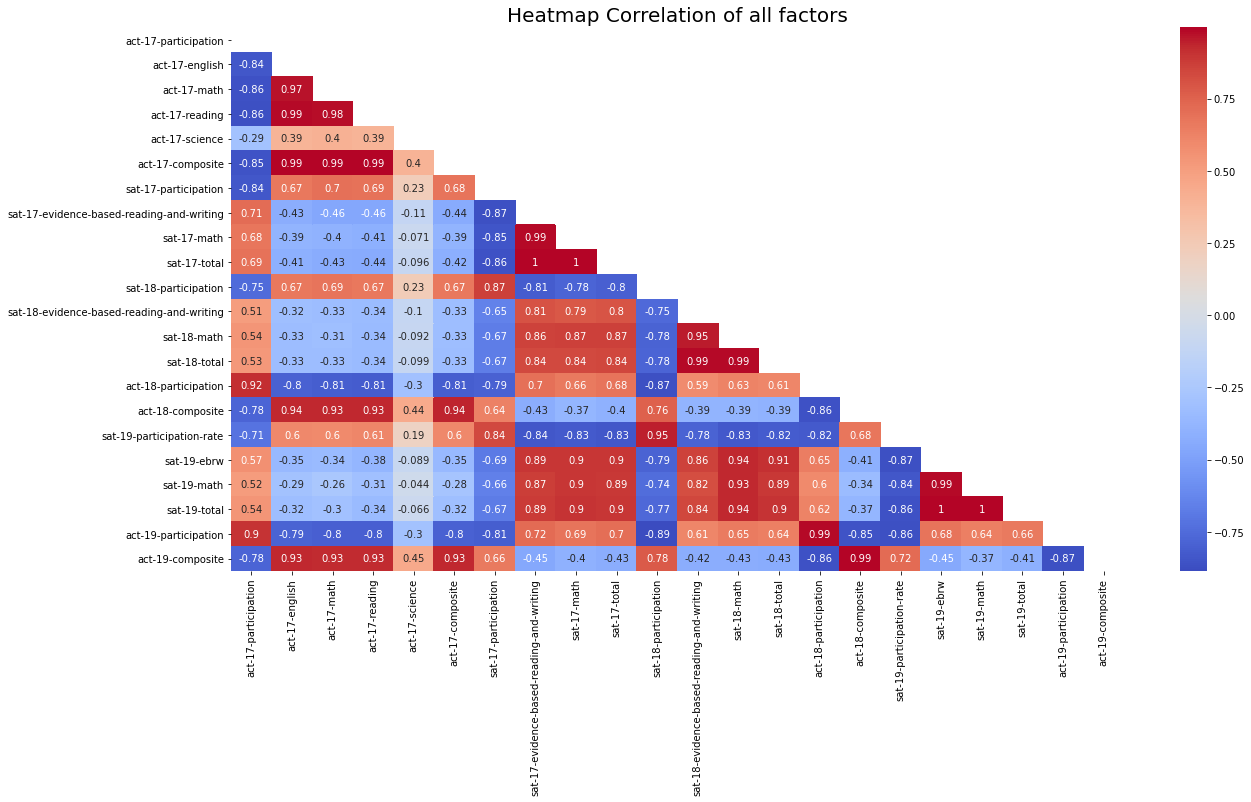

In [393]:
# Adapting code from 908 lecture because it is very pretty

mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
sns.heatmap(
    final.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);
plt.title('Heatmap Correlation of all factors', fontsize=20);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [395]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

Text(0.5, 1.0, 'uwu')

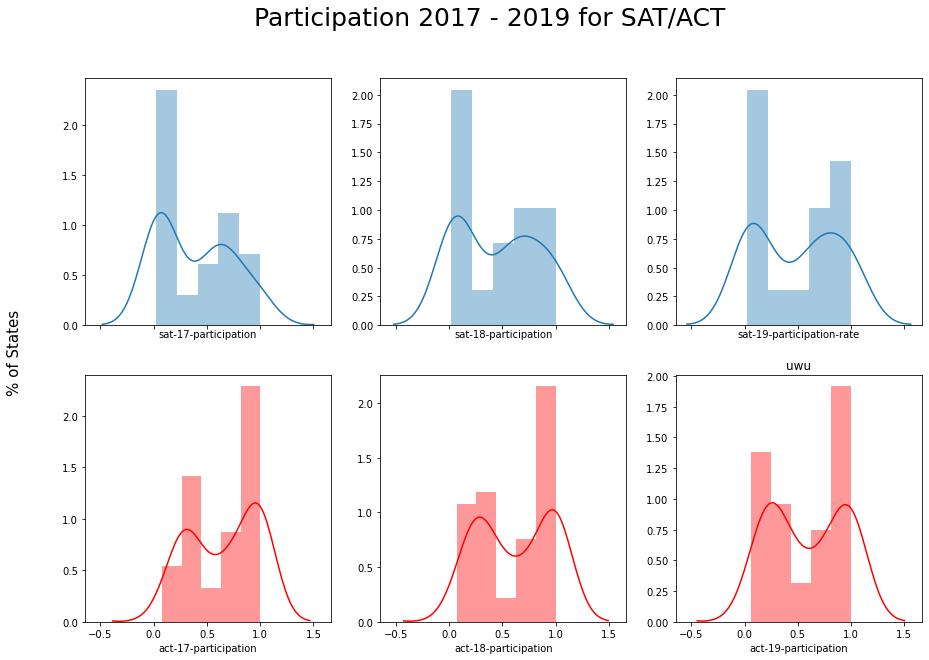

In [396]:
# Code
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)
f.suptitle('Participation 2017 - 2019 for SAT/ACT', fontsize=25)
f.text(0.06, 0.5, '% of States', ha='center', va='center', rotation='vertical', fontsize=15)

sns.distplot(final['sat-17-participation'], bins=5, ax=axes[0,0])
#plt.subplot(2, 3, 2)
sns.distplot(final['sat-18-participation'], bins=5, ax=axes[0,1])
sns.distplot(final['sat-19-participation-rate'], bins=5, ax=axes[0,2])
sns.distplot(final['act-17-participation'], bins=5, ax=axes[1,0], color='red')
sns.distplot(final['act-18-participation'], bins=5, ax=axes[1,1], color='red')
sns.distplot(final['act-19-participation'], bins=5, ax=axes[1,2], color='red')
plt.title('uwu')
             

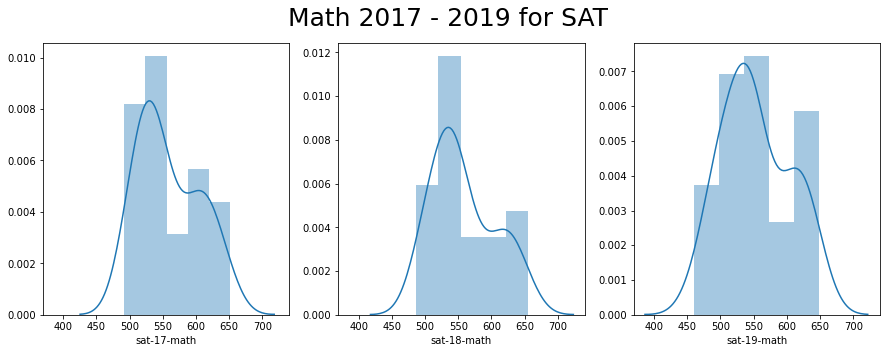

In [397]:
# Code
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
f.suptitle('Math 2017 - 2019 for SAT', fontsize=25)

sns.distplot(final['sat-17-math'], bins=5, ax=axes[0])
sns.distplot(final['sat-18-math'], bins=5, ax=axes[1])
sns.distplot(final['sat-19-math'], bins=5, ax=axes[2])
#sns.distplot(final['act-18-'], bins=5, ax=axes[1,1], color='red')
#sns.distplot(final['act-19-participation'], bins=5, ax=axes[1,2], color='red')

             

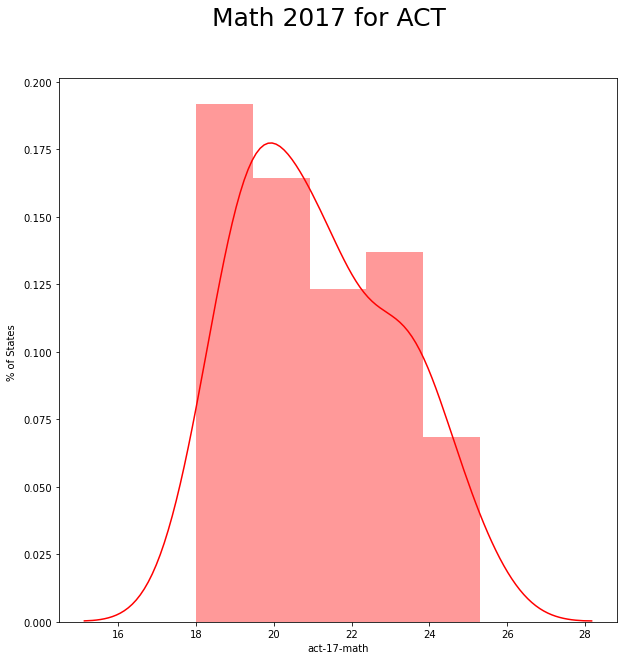

In [398]:
f, axes = plt.subplots(figsize=(10, 10), sharex=True)
f.suptitle('Math 2017 for ACT', fontsize=25)
sns.distplot(final['act-17-math'], bins=5, color='red')
f.text(0.06, 0.5, '% of States', ha='center', va='center', rotation='vertical')
#plt.title('Math 2017 for ACT', fontsize=25)
plt.ylabel='% of States'


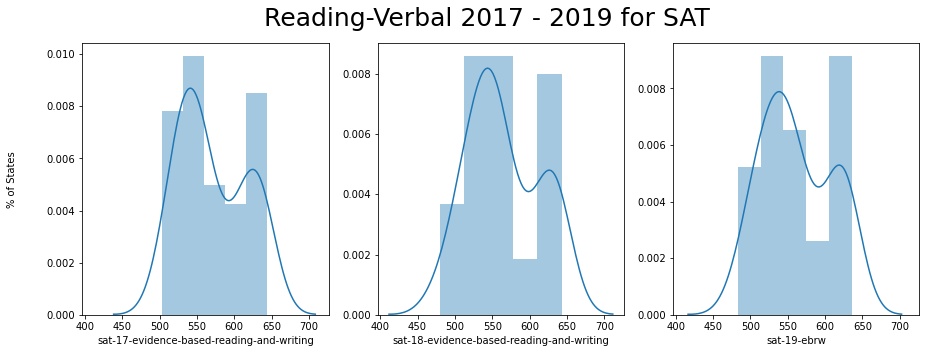

In [399]:
# Code
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
f.suptitle('Reading-Verbal 2017 - 2019 for SAT', fontsize=25)
f.text(0.06, 0.5, '% of States', ha='center', va='center', rotation='vertical')
#f.text(0.5, 0.04, 'SAT Math Score', ha='center', va='center')

sns.distplot(final['sat-17-evidence-based-reading-and-writing'], bins=5, ax=axes[0])
sns.distplot(final['sat-18-evidence-based-reading-and-writing'], bins=5, ax=axes[1])
sns.distplot(final['sat-19-ebrw'], bins=5, ax=axes[2])
       

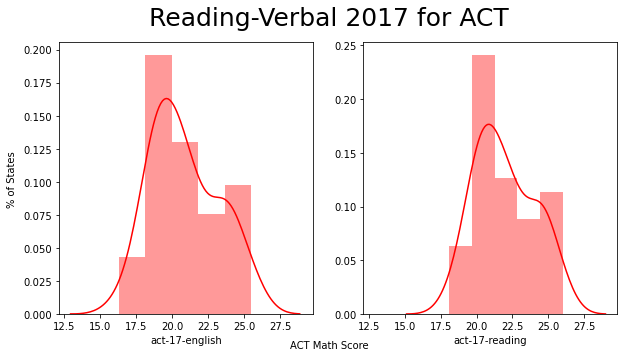

In [400]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
f.suptitle('Reading-Verbal 2017 for ACT', fontsize=25)
f.text(0.06, 0.5, '% of States', ha='center', va='center', rotation='vertical')
f.text(0.5, 0.04, 'ACT Math Score', ha='center', va='center')

sns.distplot(final['act-17-english'], bins=5, ax=axes[0], color='red')
sns.distplot(final['act-17-reading'], bins=5, ax=axes[1], color='red')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


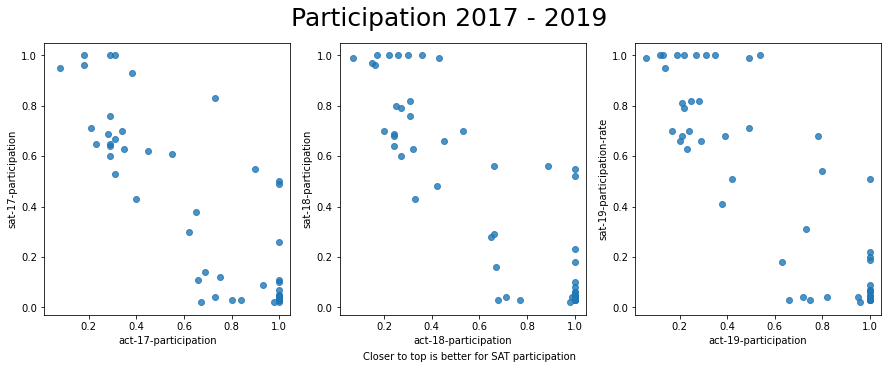

In [401]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
f.suptitle('Participation 2017 - 2019', fontsize=25)
f.text(x=.42, y=0, s='Closer to top is better for SAT participation')
#sns.scatterplot(final['act-17-participation'],final['sat-17-participation'], ax=axes[0])
sns.regplot(x=final['act-17-participation'], y=final['sat-17-participation'], ax=axes[0], fit_reg=False)
#sns.scatterplot(range(1, 51),final['act-17-participation'], ax=axes[0], color='red')

sns.regplot(x=final['act-18-participation'], y=final['sat-18-participation'], ax=axes[1], fit_reg=False)
#sns.scatterplot(range(1, 51),final['sat-18-participation'], ax=axes[1])
#sns.scatterplot(range(1, 51),final['act-18-participation'], ax=axes[1], color='red')

sns.regplot(x=final['act-19-participation'], y=final['sat-19-participation-rate'], ax=axes[2], fit_reg=False)
#sns.scatterplot(range(1, 51),final['sat-19-participation-rate'], ax=axes[2])
#sns.scatterplot(range(1, 51),final['act-19-participation'], ax=axes[2], color='red')



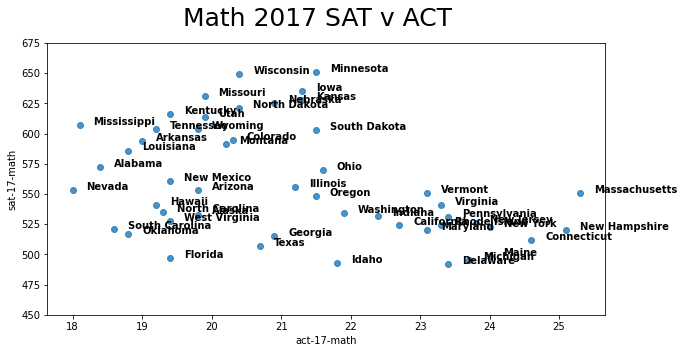

In [402]:
f, axes = plt.subplots(1, figsize=(10, 5), sharex=True)
f.suptitle('Math 2017 SAT v ACT', fontsize=25)
plt.ylim(450, 675)
a = sns.regplot(x=final['act-17-math'], y=final['sat-17-math'], fit_reg=False)

for i in range(0,final['state'].shape[0]):
     a.text(final['act-17-math'][i] + 0.2, final['sat-17-math'][i] + 0.2, final['state'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
# Source for annontating: https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/    
    
        
#sns.plt.show()
#f.text(x=.35, y=0, s='Closer to top is better for SAT')

In [403]:
final[final['state'] == 'Maryland'][['state', 'act-17-math', 'sat-17-math']] # Using boolean mapping to figure out why Maryland is plotting so far down in the figure, not sure why

,state,act-17-math,sat-17-math
19,Maryland,23.1,520


In [404]:
# Wow, the 52 might be wrong. Let's assume it's 520

In [405]:
final.iloc[19] = final.iloc[19].replace(52, 520)

In [406]:
final.iloc[19]

state                                        Maryland
act-17-participation                             0.28
act-17-english                                   23.3
act-17-math                                      23.1
act-17-reading                                   24.2
act-17-science                                    2.3
act-17-composite                                 23.6
sat-17-participation                             0.69
sat-17-evidence-based-reading-and-writing         536
sat-17-math                                       520
sat-17-total                                     1060
sat-18-participation                             0.76
sat-18-evidence-based-reading-and-writing         545
sat-18-math                                       535
sat-18-total                                     1080
act-18-participation                             0.31
act-18-composite                                 22.5
sat-19-participation-rate                        0.82
sat-19-ebrw                 

In [407]:
# Okay, fixed this entry, let's plot the map with names again

In [408]:
final.head(0)

,state,act-17-participation,act-17-english,act-17-math,act-17-reading,act-17-science,act-17-composite,sat-17-participation,sat-17-evidence-based-reading-and-writing,sat-17-math,...,sat-18-math,sat-18-total,act-18-participation,act-18-composite,sat-19-participation-rate,sat-19-ebrw,sat-19-math,sat-19-total,act-19-participation,act-19-composite


In [409]:
final[final['state'] == 'Maryland'][['sat-17-math']]

,sat-17-math
19,520


In [410]:
# Plotting it again

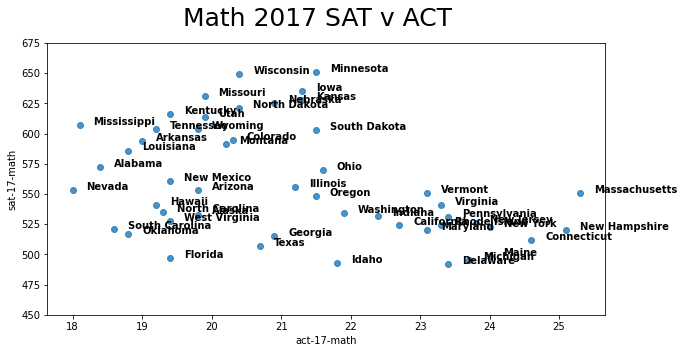

In [411]:
f, axes = plt.subplots(1, figsize=(10, 5), sharex=True)
f.suptitle('Math 2017 SAT v ACT', fontsize=25)
plt.ylim(450, 675)
a = sns.regplot(x=final['act-17-math'], y=final['sat-17-math'], fit_reg=False)

for i in range(0,final['state'].shape[0]):
     a.text(final['act-17-math'][i] + 0.2, final['sat-17-math'][i] + 0.2, final['state'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
# Source for annontating: https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/    
    
        
#sns.plt.show()
#f.text(x=.35, y=0, s='Closer to top is better for SAT')

In [412]:
# So the reason I created a method to add names is so at a glance the points can be more informative
# We are mostly looking for outliers, where the name sits by itself, things that would immediately pop out

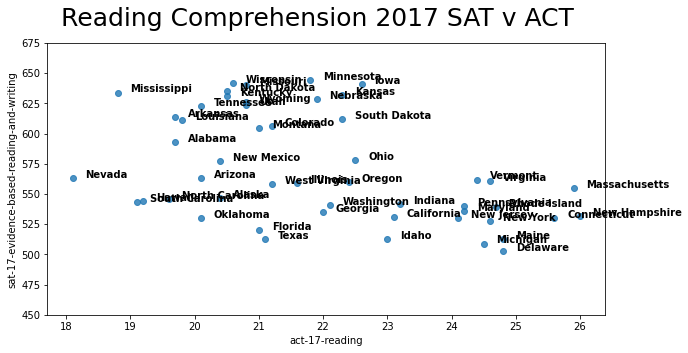

In [413]:
f, axes = plt.subplots(1, figsize=(10, 5), sharex=True)
f.suptitle('Reading Comprehension 2017 SAT v ACT', fontsize=25)
plt.ylim(450, 675)
a = sns.regplot(x=final['act-17-reading'], y=final['sat-17-evidence-based-reading-and-writing'], fit_reg=False)
#f.text(x=.35, y=0, s='Closer to top is better for SAT participation')

for i in range(0,final['state'].shape[0]):
     a.text(final['act-17-reading'][i] + 0.2, final['sat-17-evidence-based-reading-and-writing'][i] + 0.2, final['state'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
# Source for annontating: https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/ 

In [414]:
# Nothing Yet

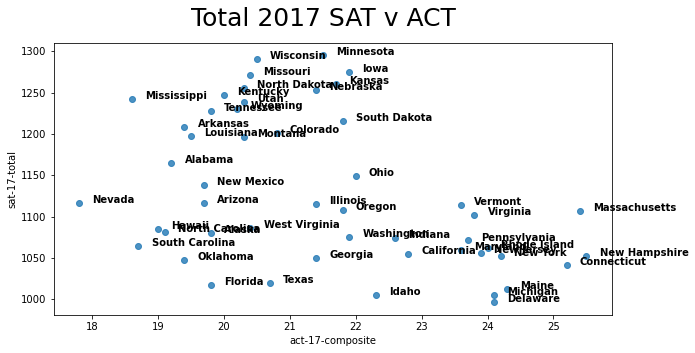

In [415]:
f, axes = plt.subplots(1, figsize=(10, 5), sharex=True)
f.suptitle('Total 2017 SAT v ACT', fontsize=25)
#plt.ylim(450, 675)
a = sns.regplot(x=final['act-17-composite'], y=final['sat-17-total'], fit_reg=False)
#f.text(x=.35, y=0, s='Closer to top is better for SAT participation')
for i in range(0,final['state'].shape[0]):
     a.text(final['act-17-composite'][i] + 0.2, final['sat-17-total'][i] + 0.2, final['state'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
# Source for annontating: https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/ 

In [416]:
# Northeast Seems to already have a bias towards higher ACT but lower SAT scores

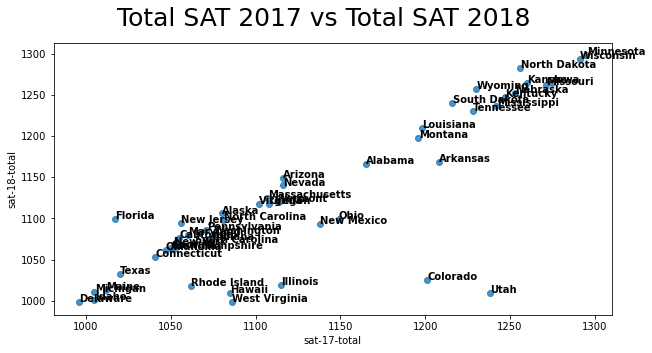

In [417]:
f, axes = plt.subplots(1, figsize=(10, 5), sharex=True)
f.suptitle('Total SAT 2017 vs Total SAT 2018', fontsize=25)
#plt.ylim(450, 675)
a = sns.regplot(x=final['sat-17-total'], y=final['sat-18-total'], fit_reg=False)
#f.text(x=.35, y=0, s='Closer to top is better for SAT participation')
for i in range(0,final['state'].shape[0]):
     a.text(final['sat-17-total'][i] + 0.2, final['sat-18-total'][i] + 0.2, final['state'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
# Source for annontating: https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/ 

In [418]:
# OOH We have outliers! Now we can notice there's something up with Utah, Colorado and maybe Florida

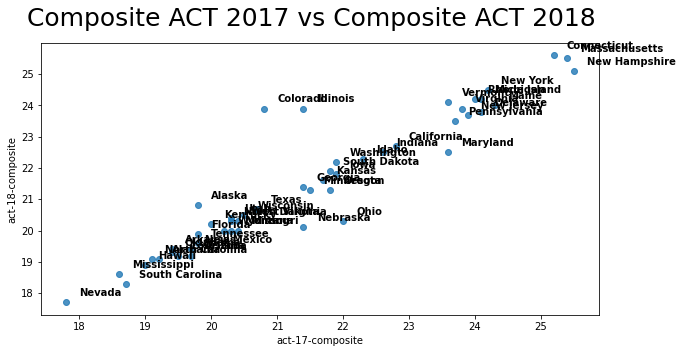

In [419]:
f, axes = plt.subplots(1, figsize=(10, 5), sharex=True)
f.suptitle('Composite ACT 2017 vs Composite ACT 2018', fontsize=25)
#plt.ylim(450, 675)
a = sns.regplot(x=final['act-17-composite'], y=final['act-18-composite'], fit_reg=False)
#f.text(x=.35, y=0, s='Closer to top is better for SAT participation')
for i in range(0,final['state'].shape[0]):
     a.text(final['act-17-composite'][i] + 0.2, final['act-18-composite'][i] + 0.2, final['state'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
# Source for annontating: https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/ 

In [420]:
# We have some new outliers! Colorado, Illinois, Alaska !

In [472]:
'''
Scatterplot Summary:

Let's pay attention to our visual outliers:

Utah, Colorado, Flordia, Illinois, Alaska

Note, some of these were found during data inference search: 

Alaska, Florida, Illinois, Colorado
'''
interesting = ['Utah', 'Colorado', 'Florida', 'Illinois', 'Alaska']

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [439]:
list(enumerate(final.columns))

[(0, 'state'),
 (1, 'act-17-participation'),
 (2, 'act-17-english'),
 (3, 'act-17-math'),
 (4, 'act-17-reading'),
 (5, 'act-17-science'),
 (6, 'act-17-composite'),
 (7, 'sat-17-participation'),
 (8, 'sat-17-evidence-based-reading-and-writing'),
 (9, 'sat-17-math'),
 (10, 'sat-17-total'),
 (11, 'sat-18-participation'),
 (12, 'sat-18-evidence-based-reading-and-writing'),
 (13, 'sat-18-math'),
 (14, 'sat-18-total'),
 (15, 'act-18-participation'),
 (16, 'act-18-composite'),
 (17, 'sat-19-participation-rate'),
 (18, 'sat-19-ebrw'),
 (19, 'sat-19-math'),
 (20, 'sat-19-total'),
 (21, 'act-19-participation'),
 (22, 'act-19-composite')]

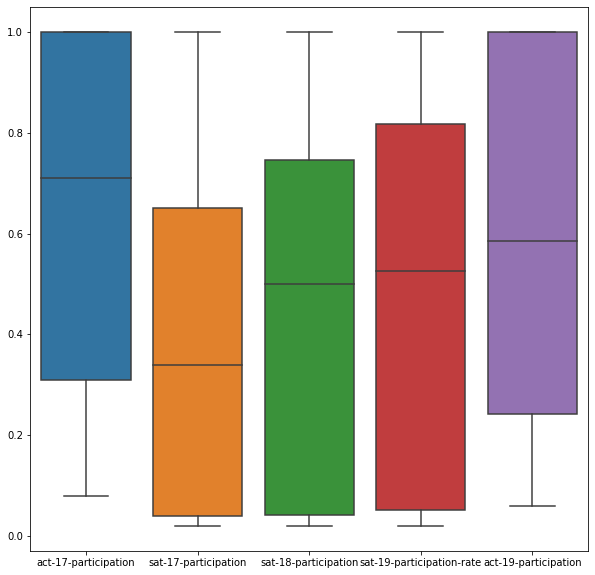

In [466]:
# Code
plt.figure(figsize=(10,10))
plt.x
sns.boxplot(data=final[['act-17-participation','sat-17-participation','sat-18-participation','sat-19-participation-rate','act-19-participation']],)

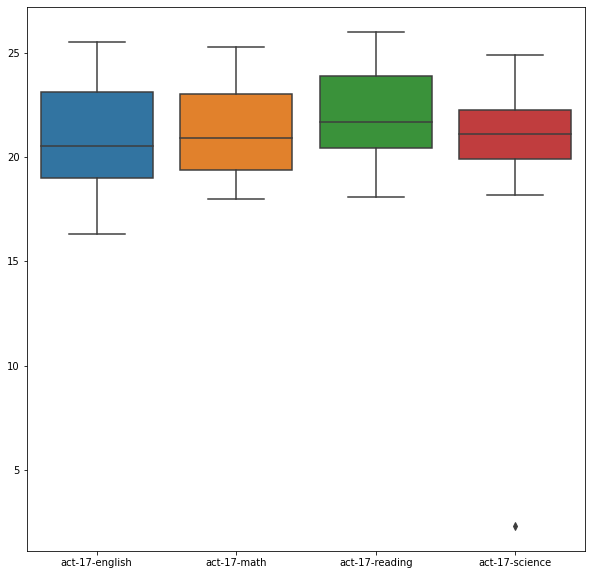

In [446]:
plt.figure(figsize=(10,10))
sns.boxplot(data=final[['act-17-english', 'act-17-math', 'act-17-reading', 'act-17-science']])

In [467]:
# There is probably something very wrong with ACT-17-science because that is one heck of an outlier

In [471]:
final[['state','act-17-science']].iloc[19]

state             Maryland
act-17-science         2.3
Name: 19, dtype: object

In [ ]:
# How the heck did Maryland get a average score of 2.3? It's probably 23 or 20.3

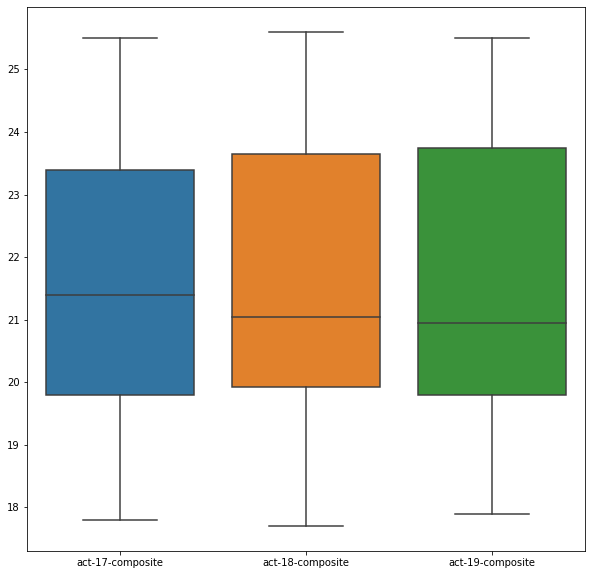

In [448]:
plt.figure(figsize=(10,10))
sns.boxplot(data=final[['act-17-composite', 'act-18-composite', 'act-19-composite']])

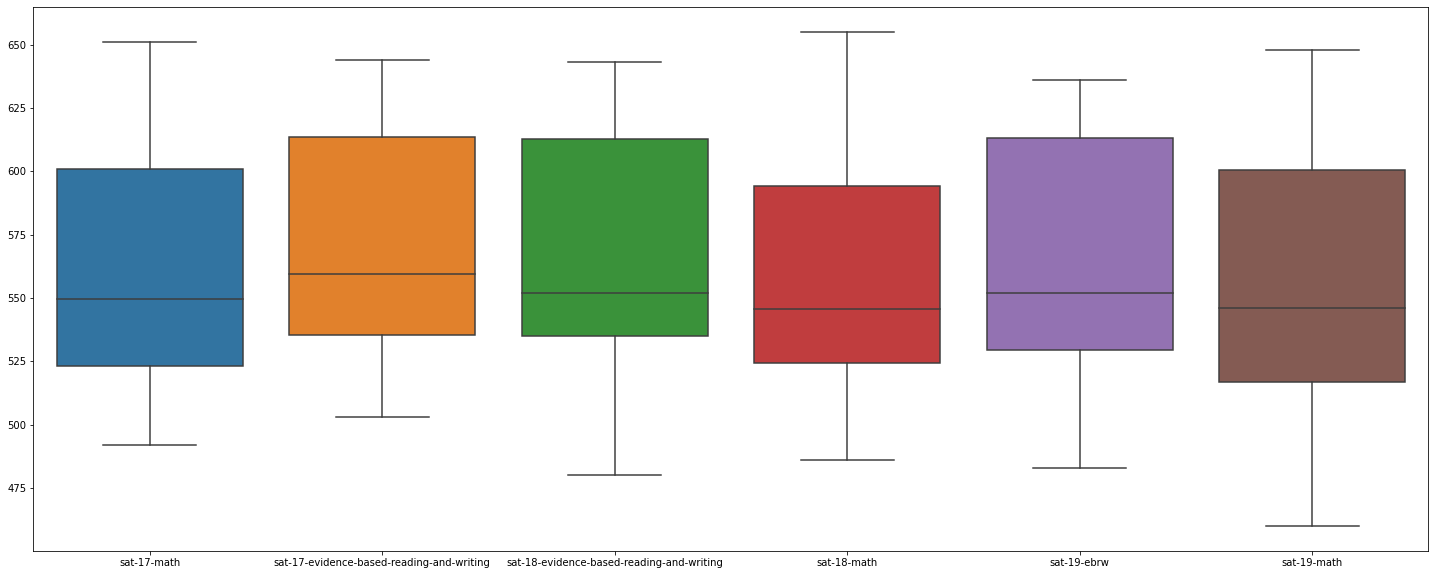

In [455]:
plt.figure(figsize=(25,10))
sns.boxplot(data=final[['sat-17-math', 'sat-17-evidence-based-reading-and-writing', 'sat-18-evidence-based-reading-and-writing', 'sat-18-math', 'sat-19-ebrw', 'sat-19-math']])

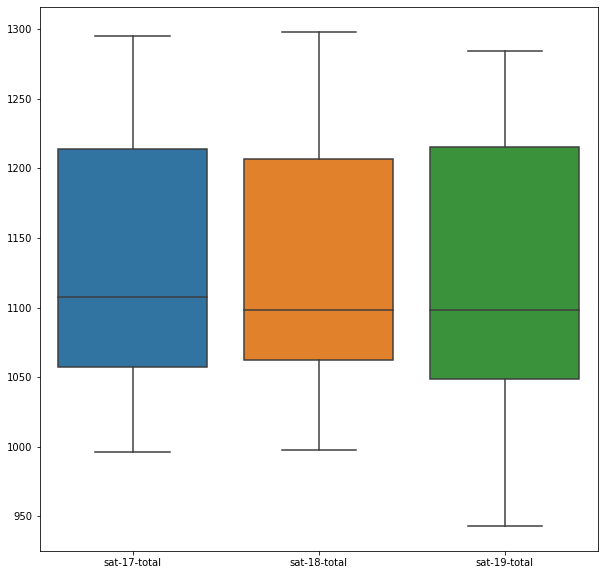

In [456]:
plt.figure(figsize=(10,10))
sns.boxplot(data=final[['sat-17-total', 'sat-18-total', 'sat-19-total']])

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [500]:
final[final['state'] == 'Alabama']['sat-17-participation']

0    0.05
Name: sat-17-participation, dtype: float64

In [506]:
[i for i in interesting]

['Utah', 'Colorado', 'Florida', 'Illinois', 'Alaska']

In [530]:
# Remember the interesting states from earlier? I stuck them into a list and let's iterate through them

# [final[['state']] == i in interesting]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [ ]:
import folium # map rendering library
import json 

# Do this later

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [ ]:
# 
# I found one source, I used this in the presentation

# https://blog.prepscholar.com/which-states-require-the-sat

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [ ]:
# Looking at a state like North Dakota:

In [545]:
final[final['state'] == 'North Dakota'][['state','act-17-participation','sat-17-participation','act-18-participation','sat-18-participation','sat-19-participation-rate','act-19-participation']]

,state,act-17-participation,sat-17-participation,act-18-participation,sat-18-participation,sat-19-participation-rate,act-19-participation
33,North Dakota,0.98,0.02,0.98,0.02,0.02,0.96


In [546]:
final[final['state'] == 'West Virginia'][['state','act-17-participation','sat-17-participation','act-18-participation','sat-18-participation','sat-19-participation-rate','act-19-participation']]

,state,act-17-participation,sat-17-participation,act-18-participation,sat-18-participation,sat-19-participation-rate,act-19-participation
47,West Virginia,0.69,0.14,0.65,0.28,0.99,0.49


In [ ]:
# And then West Virginia, there is room for a state to have both SAT and ACT testing be high
# for the states that have partipication rates < 50 %, I recommend a 3 step plan:
'''

1. Make it easier for the student to use our product: testing vouchers
2. Talk to the local and state school boards to make it a graduation requirement
3. Talk to Universities to create our High school to secondary education pipeline

'''

In [548]:
final.dtypes

state                                         object
act-17-participation                         float64
act-17-english                               float64
act-17-math                                  float64
act-17-reading                               float64
act-17-science                               float64
act-17-composite                             float64
sat-17-participation                         float64
sat-17-evidence-based-reading-and-writing      int64
sat-17-math                                    int64
sat-17-total                                   int64
sat-18-participation                         float64
sat-18-evidence-based-reading-and-writing      int64
sat-18-math                                    int64
sat-18-total                                   int64
act-18-participation                         float64
act-18-composite                             float64
sat-19-participation-rate                    float64
sat-19-ebrw                                   

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: